In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of NAPROXEN (Metabolite_id = 1661)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select bioanalysis_metabolite_price.date, bioanalysis_metabolite_price.price, bioanalysis_metabolite_price.amount, bioanalysis_metabolite_price.unity, provider.name as provider_name
                                 from bioanalysis_metabolite_price
                                 JOIN provider 
                                 on provider.id = bioanalysis_metabolite_price.provider_id
                                 where metabolite_id = 1661; ''', cnx, index_col = 'date', parse_dates=True)


df = pd.DataFrame(sql_query, columns=['price', 'amount', 'unity', 'provider_name'])
print(df)


                       price  amount unity                 provider_name
date                                                                    
2017-11-24 18:36:32   152.00     3.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32   241.00     5.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32   394.00    10.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32   152.00     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   241.00     2.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   291.00     3.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   394.00     5.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   556.00    10.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   675.00    15.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   792.00    20.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   892.00    25.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   991.00    30.0    mg         

In [5]:
df.unity.unique()

array(['µmol', 'mg', 'g', 'kg', 'mg/5ml', 'mg/ml'], dtype=object)

In [6]:
# Converter unidades 
for i in df.unity.unique():
    df.price = np.where(df.unity == i, df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
    df.amount = np.where(df.unity == i, 1, df.amount)

print(df)


                          price  amount unity                 provider_name
date                                                                       
2017-11-24 18:36:32   50.666667     1.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32   48.200000     1.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32   39.400000     1.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32  152.000000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32  120.500000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   97.000000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   78.800000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   55.600000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   45.000000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   39.600000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   35.680000     1.0    mg           InterBioScreen Ltd.
2017-11-24 1

In [7]:
# Converter x gramas em 1g !!
df.price = np.where(df.unity == 'g', df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.unity == 'g', 1, df.amount)
print(df)

                          price  amount unity                 provider_name
date                                                                       
2017-11-24 18:36:32   50.666667     1.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32   48.200000     1.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32   39.400000     1.0  µmol           InterBioScreen Ltd.
2017-11-24 18:36:32  152.000000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32  120.500000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   97.000000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   78.800000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   55.600000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   45.000000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   39.600000     1.0    mg           InterBioScreen Ltd.
2017-11-24 18:36:32   35.680000     1.0    mg           InterBioScreen Ltd.
2017-11-24 1

In [8]:
#See results grouped by provider_name
grouped_df = df.groupby(['unity','provider_name'])

for key, item in grouped_df:
    print('Unity, Provider:', key)
    print(grouped_df.get_group(key), "\n\n")

Unity, Provider: ('g', 'ACC Corporation')
                      price  amount unity    provider_name
date                                                      
2017-11-24 18:36:34  118.00     1.0     g  ACC Corporation
2017-11-24 18:36:34   23.60     1.0     g  ACC Corporation
2017-11-24 18:36:34   63.36     1.0     g  ACC Corporation
2017-12-24 18:36:46  118.00     1.0     g  ACC Corporation
2017-12-24 18:36:46   23.60     1.0     g  ACC Corporation
2017-12-24 18:36:46   63.36     1.0     g  ACC Corporation
2018-02-09 06:25:46  118.00     1.0     g  ACC Corporation
2018-02-09 06:25:46   23.60     1.0     g  ACC Corporation
2018-02-09 06:25:46   63.36     1.0     g  ACC Corporation
2018-03-09 07:56:23  118.00     1.0     g  ACC Corporation
2018-03-09 07:56:23   23.60     1.0     g  ACC Corporation
2018-03-09 07:56:23   63.36     1.0     g  ACC Corporation
2018-04-09 11:39:59  118.00     1.0     g  ACC Corporation
2018-04-09 11:39:59   23.60     1.0     g  ACC Corporation
2018-04-09 11:

                     price  amount unity                  provider_name
date                                                                   
2017-11-24 18:36:34  20.00     1.0     g  Enamine Ltd Chemspace partner
2017-11-24 18:36:34   1.28     1.0     g  Enamine Ltd Chemspace partner
2017-11-24 18:36:34  11.60     1.0     g  Enamine Ltd Chemspace partner
2017-11-24 18:36:34   9.80     1.0     g  Enamine Ltd Chemspace partner
2017-12-24 18:36:46  20.00     1.0     g  Enamine Ltd Chemspace partner
2017-12-24 18:36:46   1.28     1.0     g  Enamine Ltd Chemspace partner
2017-12-24 18:36:46  11.60     1.0     g  Enamine Ltd Chemspace partner
2017-12-24 18:36:46   9.80     1.0     g  Enamine Ltd Chemspace partner
2018-02-09 06:25:46  20.00     1.0     g  Enamine Ltd Chemspace partner
2018-02-09 06:25:46   1.28     1.0     g  Enamine Ltd Chemspace partner
2018-02-09 06:25:46  11.60     1.0     g  Enamine Ltd Chemspace partner
2018-02-09 06:25:46   9.80     1.0     g  Enamine Ltd Chemspace 

                     price  amount unity        provider_name
date                                                         
2017-11-24 18:36:32   17.0     1.0     g  J&K SCIENTIFIC LTD.
2017-11-24 18:36:32   12.6     1.0     g  J&K SCIENTIFIC LTD.
2017-11-24 18:36:32   10.5     1.0     g  J&K SCIENTIFIC LTD.
2017-12-24 18:36:43   17.0     1.0     g  J&K SCIENTIFIC LTD.
2017-12-24 18:36:43   12.6     1.0     g  J&K SCIENTIFIC LTD.
2017-12-24 18:36:43   10.5     1.0     g  J&K SCIENTIFIC LTD.
2018-02-09 06:25:45   17.0     1.0     g  J&K SCIENTIFIC LTD.
2018-02-09 06:25:45   12.6     1.0     g  J&K SCIENTIFIC LTD.
2018-02-09 06:25:45   10.5     1.0     g  J&K SCIENTIFIC LTD.
2018-03-09 07:56:22   17.0     1.0     g  J&K SCIENTIFIC LTD.
2018-03-09 07:56:22   12.6     1.0     g  J&K SCIENTIFIC LTD.
2018-03-09 07:56:22   10.5     1.0     g  J&K SCIENTIFIC LTD.
2018-04-09 11:39:58   17.0     1.0     g  J&K SCIENTIFIC LTD.
2018-04-09 11:39:58   12.6     1.0     g  J&K SCIENTIFIC LTD.
2018-04-

                          price  amount unity        provider_name
date                                                              
2018-12-07 05:56:36  152.000000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36  120.500000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   97.000000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   78.800000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   55.600000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   45.000000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   39.600000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   35.680000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   33.033333     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   23.640000     1.0    mg  InterBioScreen Doo.
2018-12-07 05:56:36   15.630000     1.0    mg  InterBioScreen Doo.
2019-01-07 05:56:44  152.000000     1.0    mg  InterBioScreen Doo.
2019-01-07 05:56:44  120.500000     1.0    mg  InterBioScreen 

                         price  amount unity    provider_name
date                                                         
2017-11-24 18:36:32  66.880000     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32  33.440000     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32  22.293333     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32  16.720000     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32  13.376000     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   9.521000     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   7.156667     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   5.974500     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   5.264000     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   4.801667     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   4.204500     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   3.846200     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   2.891600     1.0    mg  Maybridge, Ltd.
2017-11-24 18:36:32   2.414300     1.0    mg  Maybridge, Ltd.
2017-12-

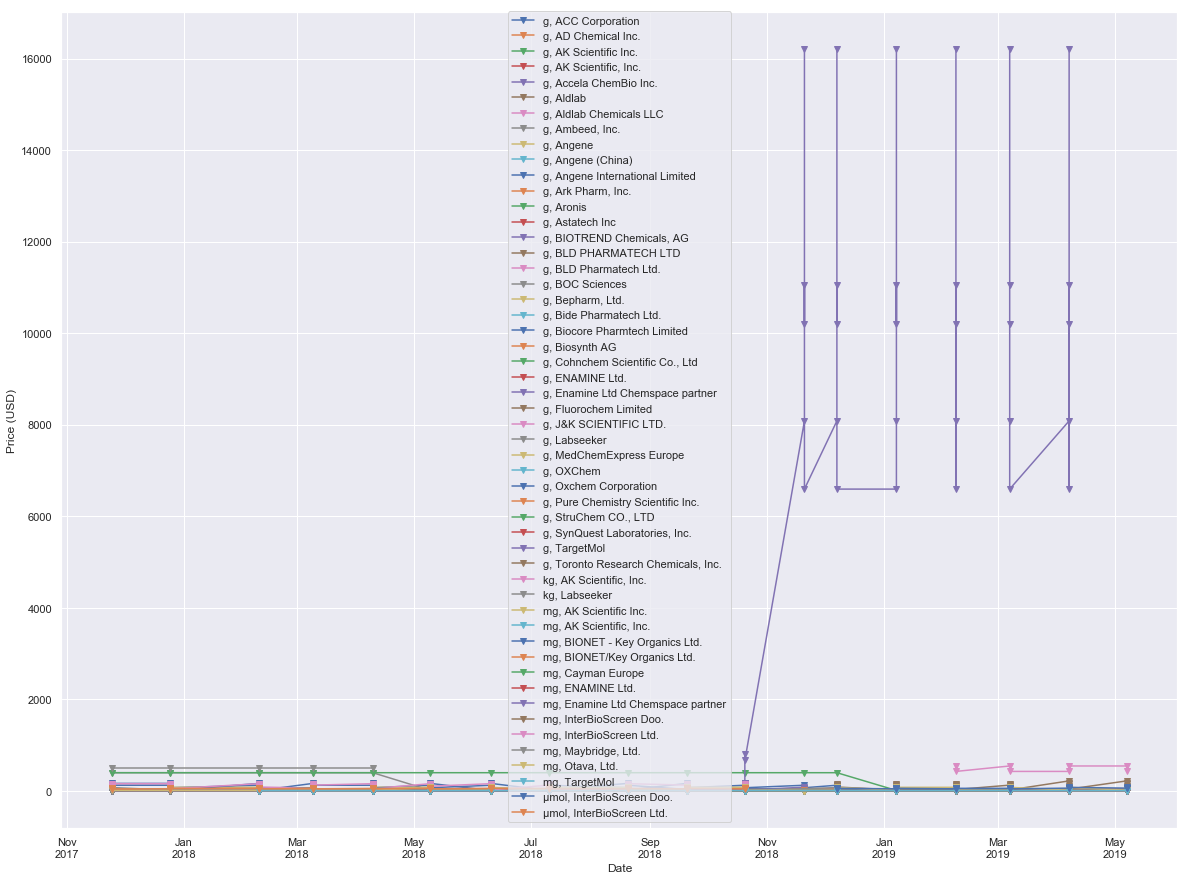

In [9]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['unity','provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [10]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of NAPROXEN',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)


opt_list = []
for key, item in grouped_df:
#     print('key:', key)
    opt_list.append(str(key[0] + ' ' + key[1]))

# print('opt_list:', opt_list)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['unity','provider_name'])['price']:
    x = pd.to_datetime(g.index)
    y = g.values
    k = str(k[0] + ' ' + k[1])
#     print('k: ', k)
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
#         print(d_x)
#         print(d_y)
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a unity,provider lacking on the x or y dict.')
    
    
def update_plot(unity):#, freq):
   data = []
   for s in unity:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines',
           name = 'u, p {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
unity = widgets.SelectMultiple(options = opt_list, description = 'Unity, Prov') #value = key_list,
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, unity = unity )#, freq = freq)

interactive(children=(SelectMultiple(description='Unity, Prov', options=('g ACC Corporation', 'g AD Chemical I…

Neste caso o provider oxchem é o que tem o preço mais baixo para a gama dos gramas.